# Shifted Rosenbrock function minimization

The goal is to optimize (minimize more precisely) the shifted Rosenbrock cost function which is multi-modal meaning it has a several global optimum

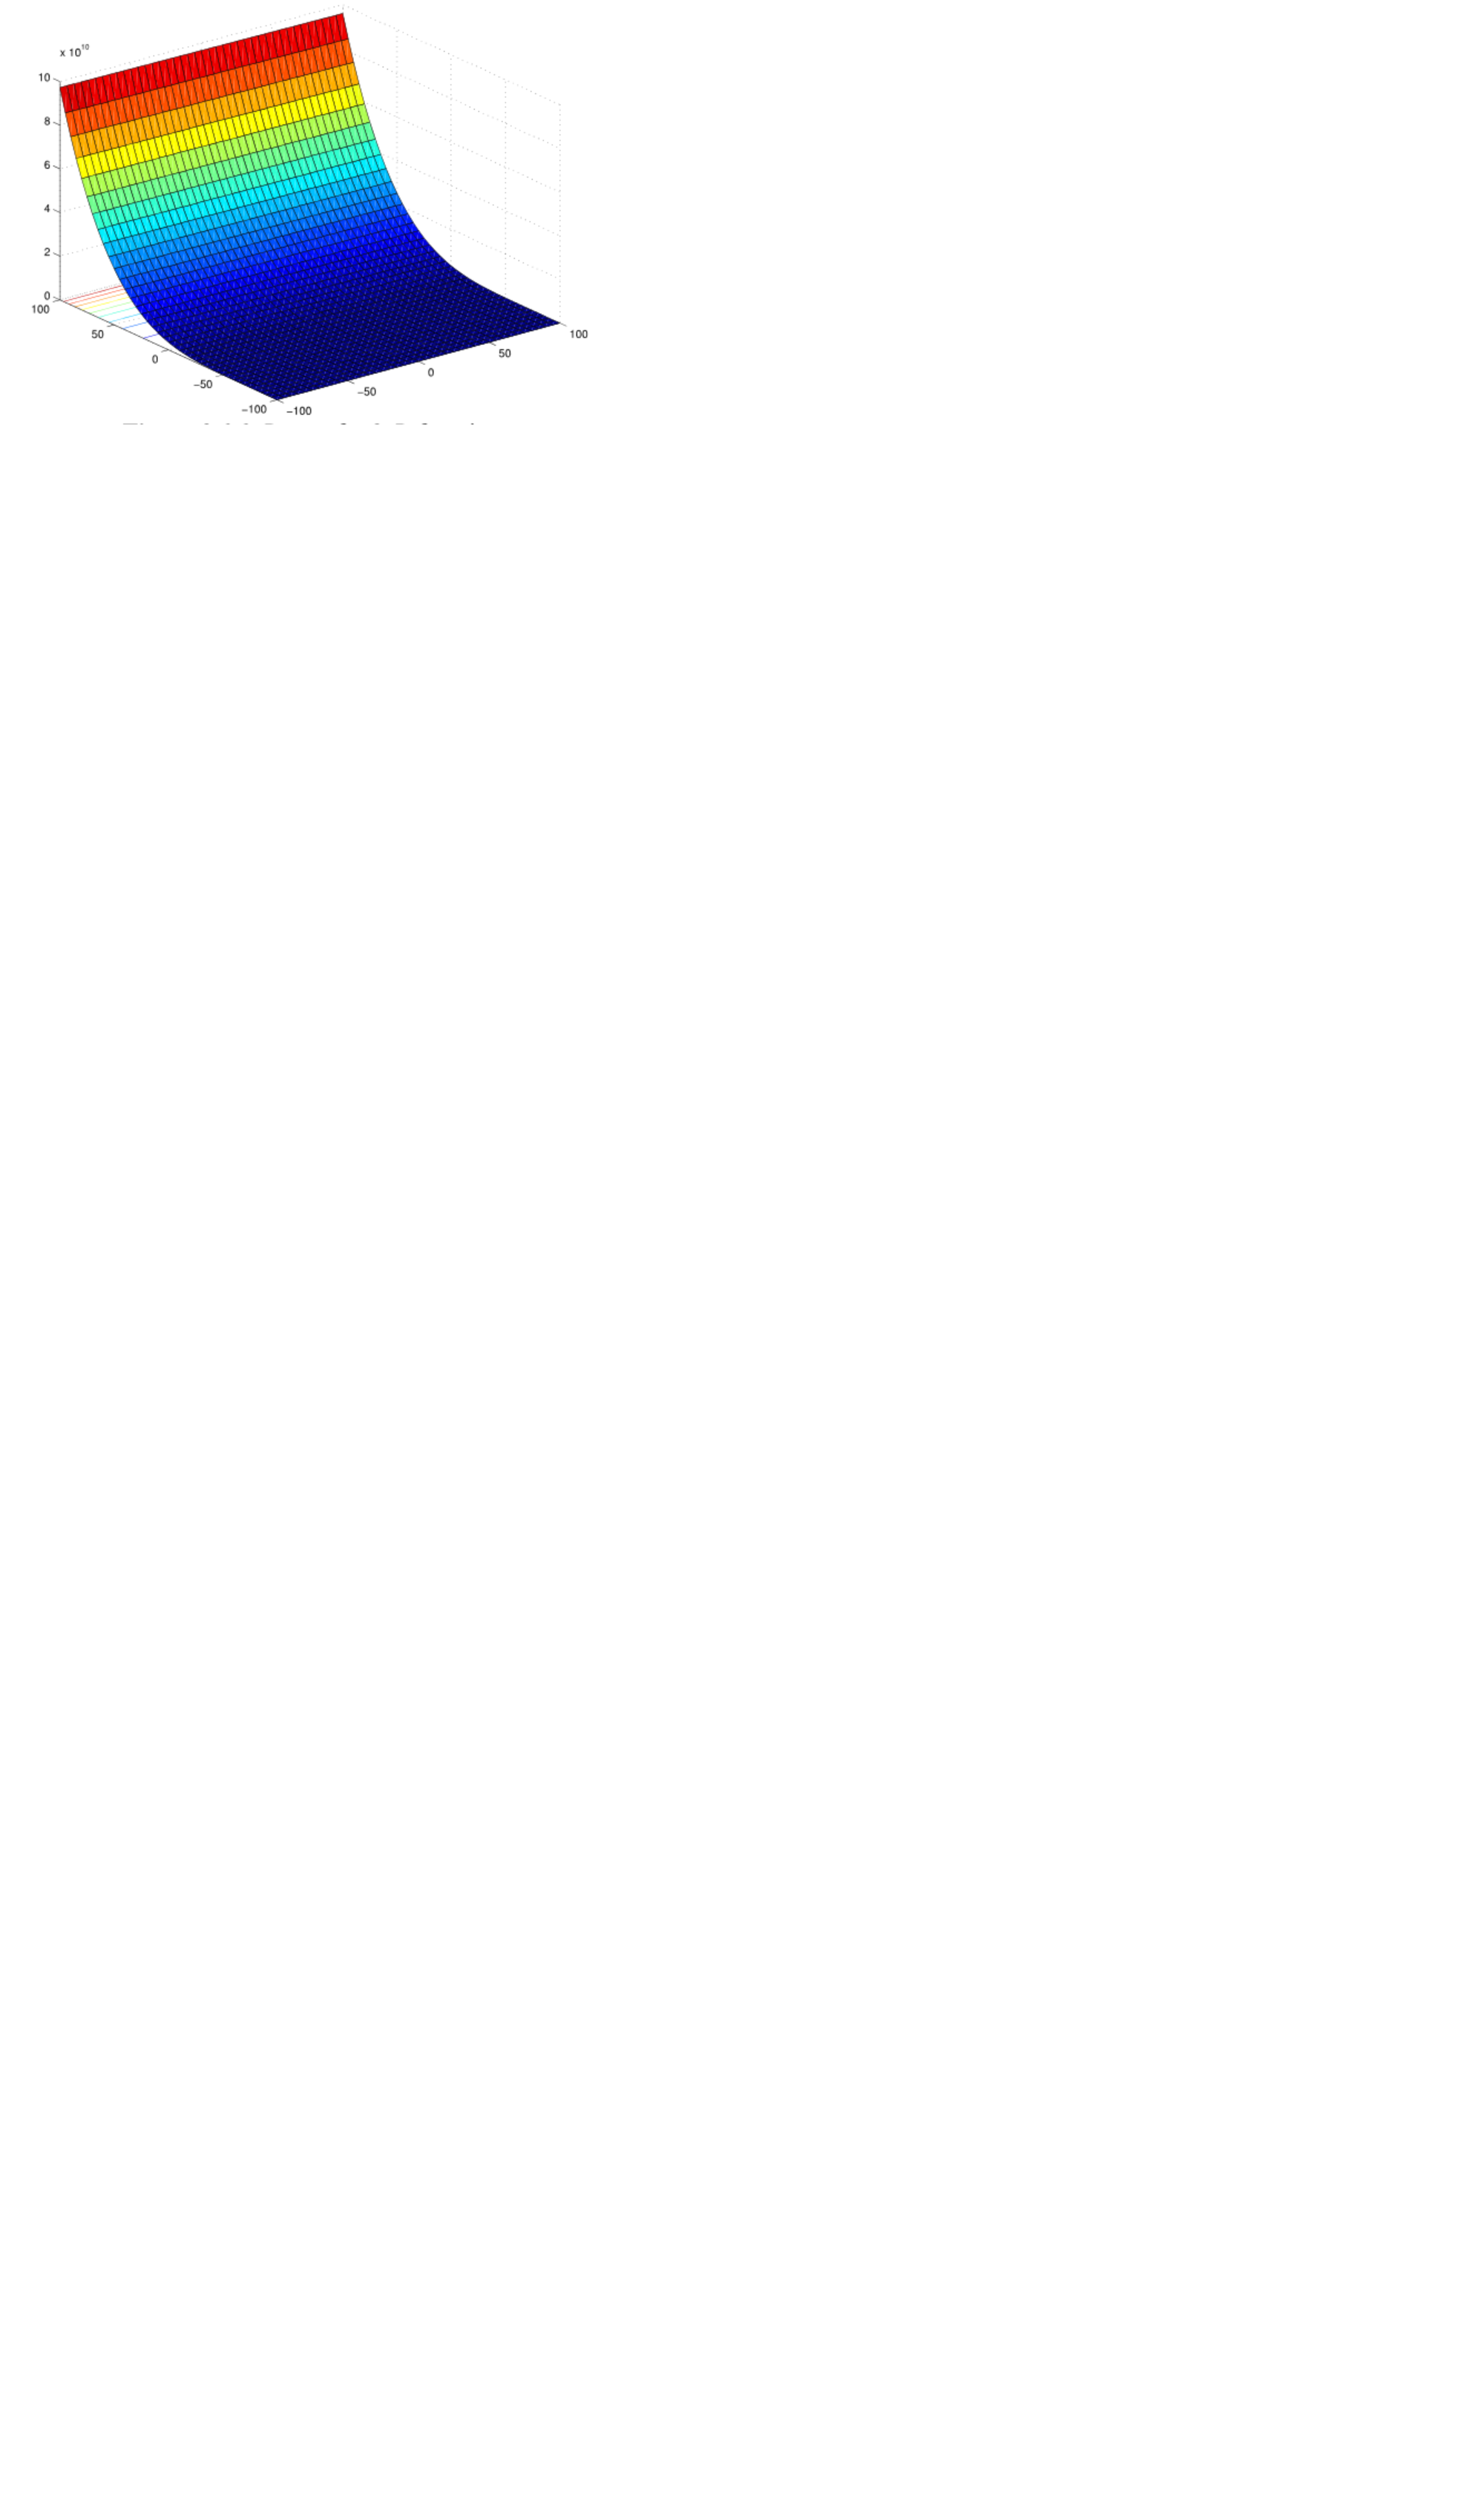

In [1]:
# Import necessaries librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# if not installed
#!pip install autograd
from autograd import grad, jacobian
import time
import timeit

In [2]:
#Define a bias for the function
f_bias = 390
d50 = 50
shift  = np.random.uniform(-100,100,d50)

In [3]:
def shifted_rosen(x):
    """Shifted-Rosenbrock objective function.

    Has a global minimum at 390 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray
    """

    #j = sum(100*((x[1:]**2-(x[:-1])**2 +x[:-1]**2)))
    z = x - shift + 1
    
    j =sum(100.0*(z[1:]-z[:-1]**2.0)**2.0 + (1-z[:-1])**2.0)

    
    return j + f_bias

In [4]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-100,100,d50)

In [5]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -100 * np.ones(d50)
max_bound_50 = 100 * np.ones(d50)
bounds_50 = (min_bound_50, max_bound_50)

In [6]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_rosen(x)
    history.append(fobj)

In [7]:
# Compute derivative of the function
jacobian_cost = jacobian(shifted_rosen)

In [8]:
#Set maximum number of iterations for dimension 50
MAX_ITER_50 = 2000

In [9]:
start_time = time.time()
res_jac_50 = minimize(shifted_rosen, x_0_50,jac = jacobian_cost,method='SLSQP', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER_50})
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.0000003966566
            Iterations: 923
            Function evaluations: 1278
            Gradient evaluations: 923
--- 5.649860858917236 seconds ---


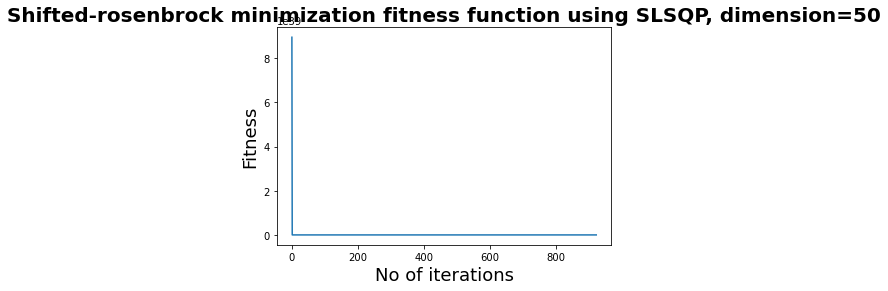

In [10]:
# Plot value of the fitness function 
plt.title("Shifted-rosenbrock minimization fitness function using SLSQP, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:MAX_ITER_50])

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [11]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [12]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = (min_bound_500, max_bound_500)

In [13]:
#Set maximum number of iterations for dimension 500
MAX_ITER_500 = 15000

In [14]:
start_time = time.time()
res_jac_500 = minimize(shifted_rosen, x_0_500,jac = jacobian_cost,method='SLSQP', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER_500})
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.0000001825594
            Iterations: 6550
            Function evaluations: 9516
            Gradient evaluations: 6550
--- 995.5551390647888 seconds ---


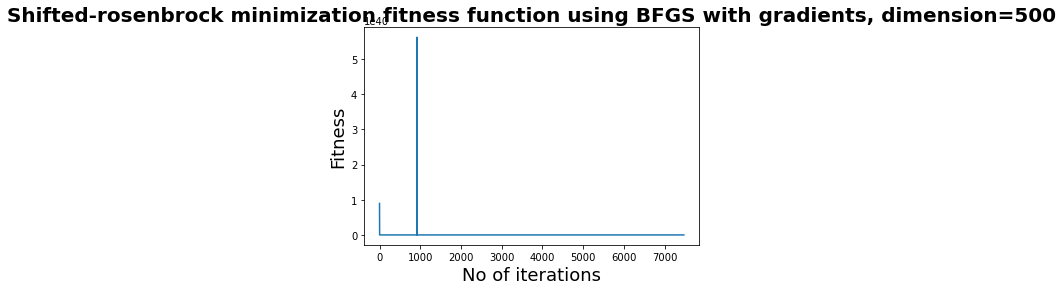

In [15]:
# Plot value of the fitness function 
plt.title("Shifted-rosenbrock minimization fitness function using BFGS with gradients, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:MAX_ITER_500])

We notice that when using the BFGS algorithm with the gradients the minimum is reached at only 3 iterations and 7 function evaluations !

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold (tol=gtol for the 'BFGS' algorithm) before successful termination.

We also used the PSO algorithm which works quite well but was more difficult to fine-tune because of it's greater number of parameters. And also it did not converge as quickly as the BFGS algorithm so finally we chose the later one.